In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

# 운영체제별 폰트 설정
if platform.system() == 'Windows':
    font_name = 'Malgun Gothic'   # 윈도우 기본 한글 폰트
elif platform.system() == 'Darwin':  # macOS
    font_name = 'AppleGothic'
else:  # Linux (예: Ubuntu, WSL 등)
    font_name = 'NanumGothic'

rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
print(f"✅ 현재 적용된 폰트: {font_name}")

✅ 현재 적용된 폰트: Malgun Gothic


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 불러오기
# 사용하는 환경에 따라 주석처리 해서 사용
df = pd.read_csv("C:/Users/user/ai_job/ai_job_market.csv") # 주피터 용
# df = pd.read_csv("/content/ai_job_market.csv") # 코랩 용
# 코랩에서 사용할때는 csv파일 업로드 해주셔야 합니다.

# 전처리
'''
컬럼 지정, salary_range_usd "-" 뒤의 값 삭제, posted_date 날짜 삭제, location ','앞의 값 삭제(도시 제거),
skills_required, tools_preferred 리스트 화, experience_level, employment_type, company_size 코드 지정
'''
# 사용할 컬럼 지정
use_cols = (['industry', 'job_title', 'skills_required',
       'experience_level', 'employment_type', 'location', 'salary_range_usd',
       'posted_date', 'company_size', 'tools_preferred'])
df = df[use_cols].copy()

# salary_range_usd "-" 뒤의 값 삭제 - 앞의 숫자 초봉이라 가정
df['salary_range_usd'] = df['salary_range_usd'].str.replace('-[^-]*$', '', regex=True)

# posted_date 날짜 삭제
df['posted_date'] = df['posted_date'].str.replace('-[^-]*$', '', regex=True)

# location ','앞의 값 삭제(도시 제거)
df['location'] = df['location'].str.replace('.*,', '', regex=True)

# skills_required 리스트 화
# df['skills_required'] = (
#     df['skills_required']
#     .dropna()       # 결측치 제거
#     .apply(lambda x: [skill.strip() for skill in x.split(',')])  # 공백 제거 후 리스트화
# )

# tools_preferred 리스트 화
df['tools_preferred'] = (
    df['tools_preferred']
    .dropna()       # 결측치 제거
    .apply(lambda x: [skill.strip() for skill in x.split(',')])  # 공백 제거 후 리스트화
)

# experience_level 코드화 {Entry(신입): 0, Mid(경력): 1, Senior(시니어): 3}
df["experience_level"] = df["experience_level"].map({"Entry": 0, "Mid": 1, 'Senior': 2})

# employment_type 코드화 {Contract(계약직): 0, Remote(프리렌서): 1, Internship(인턴십): 2, , Full-time(정규직): 3}
df["employment_type"] = df["employment_type"].map({"Contract": 0, "Remote": 1, 'Internship': 2, 'Full-time': 3})

# company_size 코드화 {Startup(스타트업): 0, Mid(중소기업): 1, Large(대기업): 2}
df["company_size"] = df["company_size"].map({"Startup": 0, "Mid": 1, 'Large': 2})

df

,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",1,3,AR,92860,2025-08,2,"[KDB+, LangChain]"
1,Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",2,3,CU,78523,2024-03,2,"[FastAPI, KDB+, TensorFlow]"
2,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",0,3,CM,124496,2025-09,2,"[BigQuery, PyTorch, Scikit-learn]"
3,Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",1,3,FI,50908,2024-05,2,"[TensorFlow, BigQuery, MLflow]"
4,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",2,0,NE,98694,2025-02,2,"[PyTorch, LangChain]"
...,...,...,...,...,...,...,...,...,...,...
1995,Finance,NLP Engineer,"Flask, FastAPI, Power BI",2,2,SD,90382,2024-04,2,[MLflow]
1996,Automotive,AI Product Manager,"R, Flask, Excel, C++, CUDA, Scikit-learn",1,1,ZA,47848,2023-12,2,"[KDB+, LangChain, MLflow]"
1997,Education,Data Analyst,"Hugging Face, Excel, Scikit-learn, R, MLflow",0,0,CG,134994,2023-10,2,[PyTorch]
1998,Education,Quant Researcher,"AWS, Python, Scikit-learn",2,0,OM,62388,2024-08,2,"[MLflow, TensorFlow, FastAPI]"


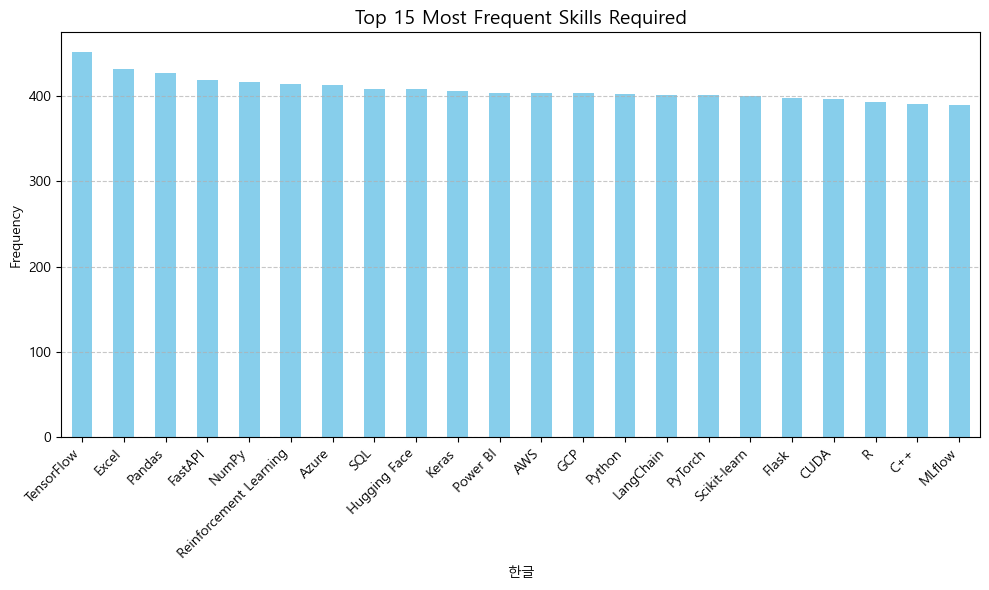

In [ ]:
skills_series = (
    df['skills_required']
    .dropna()
    .str.split(',')          # 콤마 기준 분리
    .explode()               # 리스트 풀기
    .str.strip()             # 공백 제거
)

# 기술별 등장 횟수 계산
skill_counts = skills_series.value_counts()

# 상위 15개 기술만 시각화
plt.figure(figsize=(10,6))
skill_counts.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Frequent Skills Required', fontsize=14)
plt.xlabel('한글')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
✅ 사용 폰트: NanumGothic


/tmp/ipython-input-148987986.py:63: UserWarning: Glyph 10004 (\N{HEAVY CHECK MARK}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10004 (\N{HEAVY CHECK MARK}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


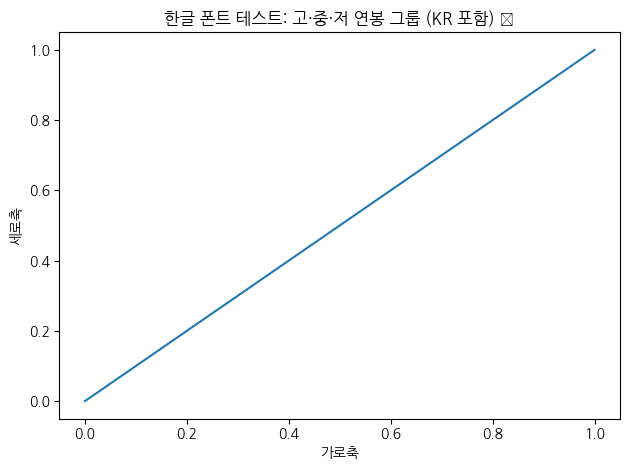


📌 대표 5개 국가 (KR 포함):
High Salary: ['EE', 'LV', 'SK', 'RS', 'GE']
Mid Salary: ['DZ', 'IS', 'UA', 'TR', 'SE']
Low Salary: ['RU', 'BJ', 'SI', 'MW', 'GH']


/tmp/ipython-input-148987986.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(



💡 대표 기술 상위 2개:
High Salary: Scikit-learn, Azure
Mid Salary: TensorFlow, SQL
Low Salary: Excel, TensorFlow


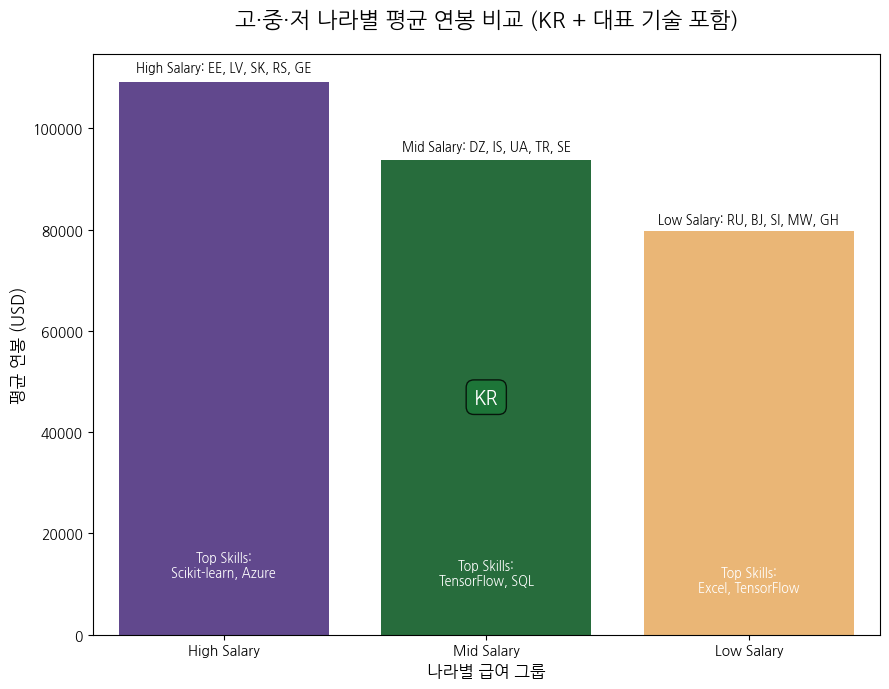

In [2]:
# =====================================================
# 나라별 연봉 비교(작업자:김효중)
# ✅ [1] 라이브러리 불러오기
# =====================================================

# =====================================================
# ✅ Colab 한글 폰트 완전 고정 템플릿 (자동 탐지·자동 선택)
# 런타임 세션 다시 시작후 코드 입력
# =====================================================
!apt-get update -qq > /dev/null
!apt-get install -y fonts-noto-cjk fonts-nanum > /dev/null
!fc-cache -fv > /dev/null

import os, glob, shutil
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1) matplotlib 폰트 캐시 폴더 보장 + 기존 캐시 파일 정리
cache_dir = os.path.join(os.path.expanduser("~"), ".cache", "matplotlib")
os.makedirs(cache_dir, exist_ok=True)
for f in glob.glob(os.path.join(cache_dir, "fontlist-*.json*")):
    try:
        os.remove(f)
    except FileNotFoundError:
        pass

# 2) 시스템 폰트 목록 새로 읽기
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')  # 있으면 등록
# (Noto CJK는 패키지 설치 시 자동 등록됨)

# 3) 사용 가능한 한글 폰트 자동 탐지
candidates = [
    "NanumGothic",
    "Noto Sans CJK KR",   # 권장
    "Noto Sans CJK",      # 일부 배포판에서 이 이름으로만 잡힐 수 있음
    "Noto Sans CJK SC",   # 혹시 중국어 패키지만 깔렸을 때 대체
]
available = {f.name for f in fm.fontManager.ttflist}
chosen = None
for name in candidates:
    if any(name == a or name in a for a in available):
        chosen = name
        break
if chosen is None:
    chosen = "DejaVu Sans"  # 최후의 안전장치(한글 미지원)

# 4) 전역 폰트 설정 (FontProperties 객체 사용 안 함 → TypeError 예방)
plt.rcParams.update({
    "font.family": chosen,
    "font.sans-serif": [chosen],
    "axes.unicode_minus": False,
    "font.size": 10,
})

print("✅ 사용 폰트:", chosen)
# 간단 테스트
plt.figure()
plt.title("한글 폰트 테스트: 고·중·저 연봉 그룹 (KR 포함) ✔")
plt.plot([0,1],[0,1])
plt.xlabel("가로축")
plt.ylabel("세로축")
plt.tight_layout()
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.font_manager as fm
import os
import re

# =====================================================
# ✅ [2] 데이터 불러오기 및 전처리
# =====================================================
df = pd.read_csv("ai_job_market.csv")

# 🔹 location에서 국가 코드만 추출 (예: "Tracybury, AR" → "AR")
df['location'] = df['location'].astype(str).apply(lambda x: x.split(',')[-1].strip() if ',' in x else x.strip())

# 🔹 salary_range_usd에서 앞 숫자만 추출 (예: "92860-109598" → 92860)
def extract_min_salary(s):
    if pd.isna(s):
        return None
    match = re.match(r'(\d+)', str(s))
    return int(match.group(1)) if match else None

df['salary_range_usd'] = df['salary_range_usd'].apply(extract_min_salary)

# =====================================================
# ✅ [3] 국가별 평균 연봉 계산 및 KMeans 클러스터링
# =====================================================
country_salary = df.groupby('location')['salary_range_usd'].mean().reset_index()
country_salary.columns = ['country', 'avg_salary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_salary[['avg_salary']])
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
country_salary['cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터별 평균 연봉 계산
cluster_mean = country_salary.groupby('cluster')['avg_salary'].mean().reset_index()
cluster_mean = cluster_mean.sort_values('avg_salary', ascending=False).reset_index(drop=True)
cluster_mean['group'] = ['High Salary', 'Mid Salary', 'Low Salary']

# 클러스터 → 그룹 매핑
cluster_to_group = dict(zip(cluster_mean['cluster'], cluster_mean['group']))
country_salary['salary_group'] = country_salary['cluster'].map(cluster_to_group)

# =====================================================
# ✅ [4] KR 누락 시 강제 추가
# =====================================================
if 'KR' not in country_salary['country'].values:
    kr_avg = df['salary_range_usd'].mean()
    kr_row = pd.DataFrame([{'country': 'KR', 'avg_salary': kr_avg, 'salary_group': 'Mid Salary'}])
    country_salary = pd.concat([country_salary, kr_row], ignore_index=True)

# =====================================================
# ✅ [5] 각 그룹별 대표 5개 국가 (KR 포함)
# =====================================================
representatives = {}
for group in ['High Salary', 'Mid Salary', 'Low Salary']:
    subset = country_salary[country_salary['salary_group'] == group]
    if subset.empty:
        continue

    if group == 'Low Salary':
        reps = subset.sort_values('avg_salary', ascending=True).head(5)
    else:
        reps = subset.sort_values('avg_salary', ascending=False).head(5)

    # KR 포함 보장
    if group == 'Mid Salary' and 'KR' not in reps['country'].values:
        kr_row = subset[subset['country'] == 'KR']
        reps = pd.concat([reps, kr_row]).drop_duplicates('country').head(5)

    representatives[group] = reps['country'].tolist()

print("\n📌 대표 5개 국가 (KR 포함):")
for group, countries in representatives.items():
    print(f"{group}: {countries}")

# =====================================================
# ✅ [6] 각 그룹별 대표 기술(skill) 2개 추출
# =====================================================
skill_summary = {}

if 'skills_required' in df.columns:
    df['skills_required'] = df['skills_required'].fillna("")
    df_expanded = df.assign(skill=df['skills_required'].str.split(',')).explode('skill')
    df_expanded['skill'] = df_expanded['skill'].str.strip()

    for group in ['High Salary', 'Mid Salary', 'Low Salary']:
        group_countries = country_salary[country_salary['salary_group'] == group]['country']
        group_df = df_expanded[df_expanded['location'].isin(group_countries)]
        top_skills = (
            group_df['skill']
            .value_counts()
            .head(2)
            .index
            .tolist()
        )
        skill_summary[group] = ", ".join(top_skills)
else:
    skill_summary = {g: "N/A" for g in ['High Salary', 'Mid Salary', 'Low Salary']}

print("\n💡 대표 기술 상위 2개:")
for group, skills in skill_summary.items():
    print(f"{group}: {skills}")

# =====================================================
# ✅ [7] 시각화
# =====================================================
plt.figure(figsize=(9, 7))
bar_colors = ['#5e3c99', '#1b7837', '#fdb863']

sns.barplot(
    x='group',
    y='avg_salary',
    data=cluster_mean,
    palette=bar_colors
)

plt.title("고·중·저 나라별 평균 연봉 비교 (KR + 대표 기술 포함)", fontsize=16, pad=20)
plt.xlabel("나라별 급여 그룹", fontsize=12)
plt.ylabel("평균 연봉 (USD)", fontsize=12)

# -----------------------------
# 상단에 대표 국가 표시
# -----------------------------
for i, row in cluster_mean.iterrows():
    group = row['group']
    reps = ", ".join(representatives.get(group, []))
    plt.text(
        i, row['avg_salary'] + (row['avg_salary'] * 0.02),
        f"{group}: {reps}",
        ha='center', fontsize=9, color='black'
    )

# -----------------------------
# 중앙에 KR 강조 (Mid Salary)
# -----------------------------
mid_row = cluster_mean[cluster_mean['group'] == 'Mid Salary']
if not mid_row.empty:
    i = mid_row.index[0]
    y = mid_row['avg_salary'].values[0]
    plt.text(
        i, y / 2,
        "KR",
        ha='center', va='center',
        fontsize=14, fontweight='bold', color='white',
        bbox=dict(facecolor='#1b7837', alpha=0.8, boxstyle='round,pad=0.4')
    )

# -----------------------------
# ✅ 막대 내부 하단에 대표 기술 표시 (글씨 흰색)
# -----------------------------
for i, row in cluster_mean.iterrows():
    group = row['group']
    skills = skill_summary.get(group, "")
    y = row['avg_salary'] * 0.1   # 막대 내부 하단 (10% 위치)
    plt.text(
        i, y,
        f"Top Skills:\n{skills}",
        ha='center', va='bottom',
        fontsize=9, color='white', fontweight='bold'
    )

plt.tight_layout()
plt.show()
